# Predictive Analysis Prediksi Harga Emas

oleh : M. Kelvin Difa

Proyek Submission 1 - Machine Learning Terapan Dicoding

# Pendahuluan

Pada proyek ini, topik yang dibahas adalah mengenai ekonomi dan bisnis yang di buat untuk memprediksi harga emas di masa mendatang. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding.

# 1. Mengimpor pustaka/modul python yang dibutuhkan

In [ ]:
import numpy as np #untuk operasi numerik
import matplotlib.pyplot as plt #untuk visualisasi data
import pandas as pd #untuk pengolahan data
%matplotlib inline
import seaborn as sns #untuk visualisasi data

# 2. Mempersiapkan Dataset

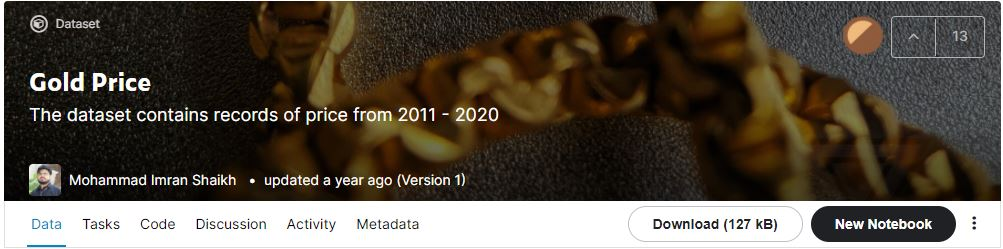

Informasi Dataset :

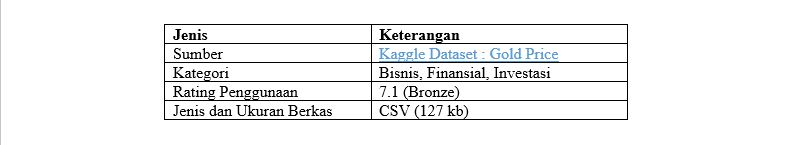

# 3. Pemahaman Data *(Data Understanding)*

# 3.1 Memuat Data pada sebuah Dataframe menggunakan *pandas*

In [ ]:
gold = pd.read_csv('/content/GoldPrice.csv')
gold

,Date,Price,Open,High,Low,Chg%
0,"Sep 11, 2020",1957.35,1952.55,1963.3,1944.35,-0.0035
1,"Sep 10, 2020",1964.30,1955.30,1975.2,1948.60,0.0048
2,"Sep 09, 2020",1954.90,1939.40,1959.7,1926.30,0.0060
3,"Sep 08, 2020",1943.20,1938.00,1948.3,1911.70,0.0031
4,"Sep 07, 2020",1937.10,1940.70,1947.4,1930.45,-0.0018
...,...,...,...,...,...,...
2526,"Jan 07, 2011",1368.50,1372.70,1377.2,1355.50,-0.0021
2527,"Jan 06, 2011",1371.40,1374.80,1376.5,1368.90,-0.0015
2528,"Jan 05, 2011",1373.40,1383.40,1384.0,1364.20,-0.0037
2529,"Jan 04, 2011",1378.50,1409.60,1410.9,1375.80,-0.0310


In [ ]:
# Drop kolom Date
gold.drop('Date', axis=1, inplace=True)

# 3.2 Keterangan kolom pada dataset

In [ ]:
# Memuat informasi pada dataset
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2531 non-null   float64
 1   Open    2531 non-null   float64
 2   High    2531 non-null   float64
 3   Low     2531 non-null   float64
 4   Chg%    2531 non-null   float64
dtypes: float64(5)
memory usage: 99.0 KB


In [ ]:
# Memuat deskripsi setiap kolom dataframe
gold.describe()

,Price,Open,High,Low,Chg%
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,1428.516148,1421.804058,1426.688119,1416.290885,0.000254
std,179.401005,183.482977,187.313509,179.204684,0.016016
min,1070.800000,1070.100000,1074.200000,1069.200000,-0.111300
25%,1300.200000,1291.350000,1293.885000,1288.300000,-0.004700
50%,1370.300000,1360.500000,1362.300000,1359.300000,0.000100
75%,1551.200000,1552.000000,1561.350000,1541.150000,0.005300
max,2069.400000,2076.400000,2089.200000,2049.000000,0.127100


# 3.3 Visualisasi Data

Memeriksa outliers tiap kolom

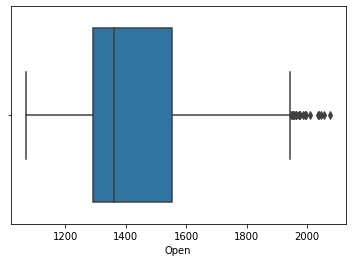

In [ ]:
#Fitur opening price of the day
sns.boxplot(x=gold['Open'])

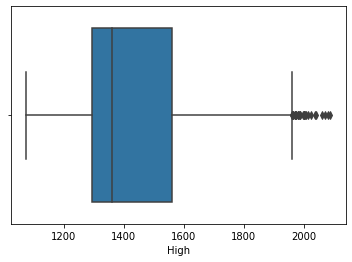

In [ ]:
#Fitur highest price of the day
sns.boxplot(x=gold['High'])

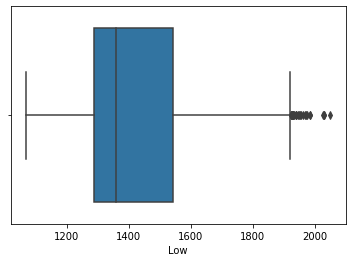

In [ ]:
#Fitur lowest price of the day
sns.boxplot(x=gold['Low'])

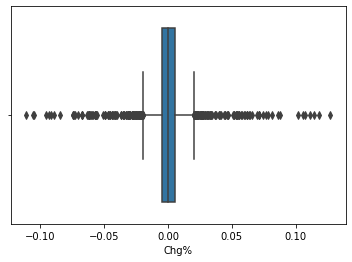

In [ ]:
#Fitur percentage change from previous day closing price
sns.boxplot(x=gold['Chg%'])

In [ ]:
# Mengatasi outliers dengan metode IQR
Q1 = gold.quantile(0.25)
Q3 = gold.quantile(0.75)
IQR=Q3-Q1
gold=gold[~((gold<(Q1-1.5*IQR))|(gold>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
gold.shape

(2283, 5)

In [ ]:
# Deskripsikan numerical fitur
numerical_features = ['Open', 'High', 'Low', 'Chg&']

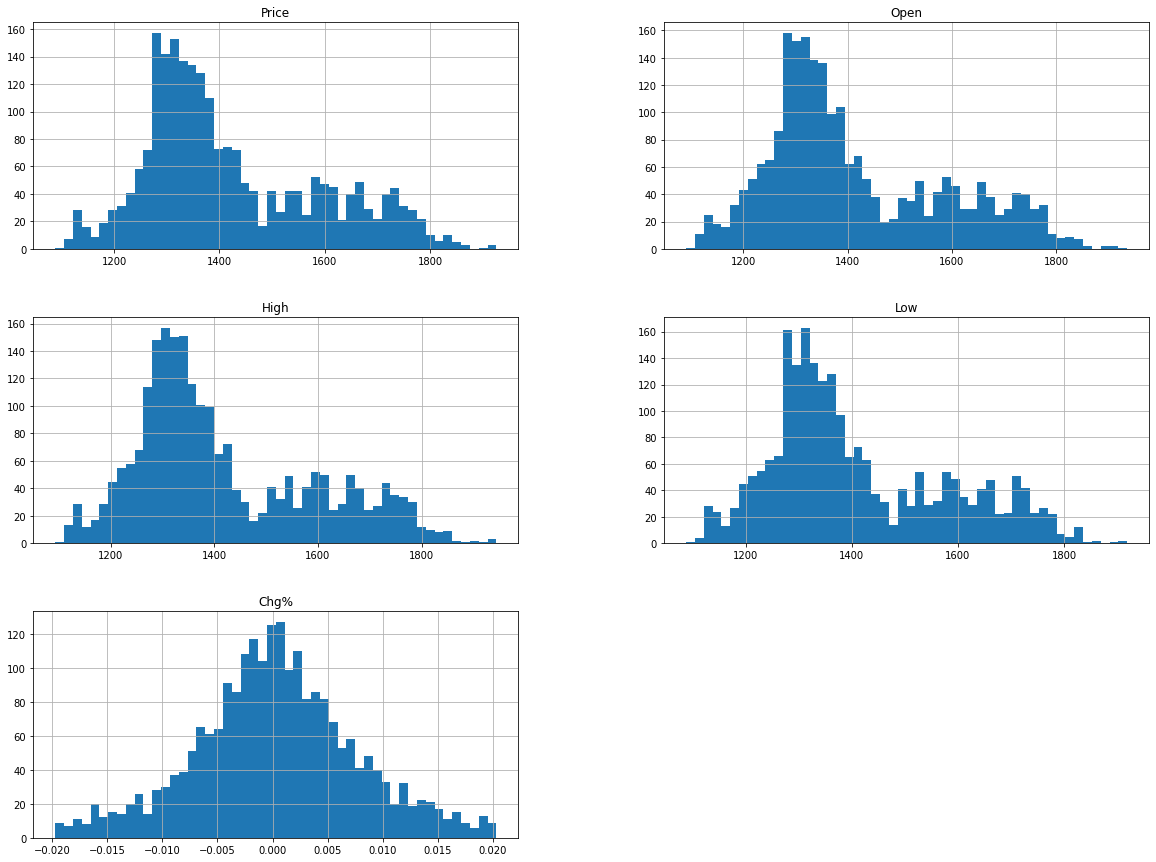

In [ ]:
# Cek histogram fitur numerik
gold.hist(bins=50, figsize=(20,15))
plt.show()

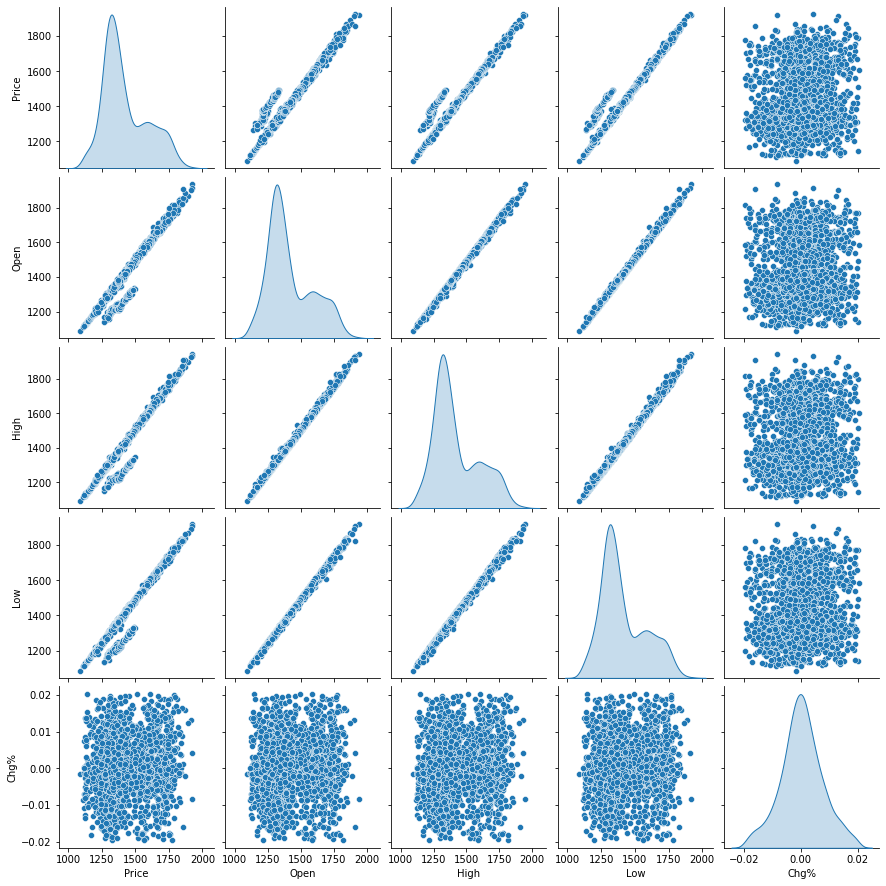

In [ ]:
# Cek hubungan antara fitur numerik menggunakan pairplot()
sns.pairplot(gold, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

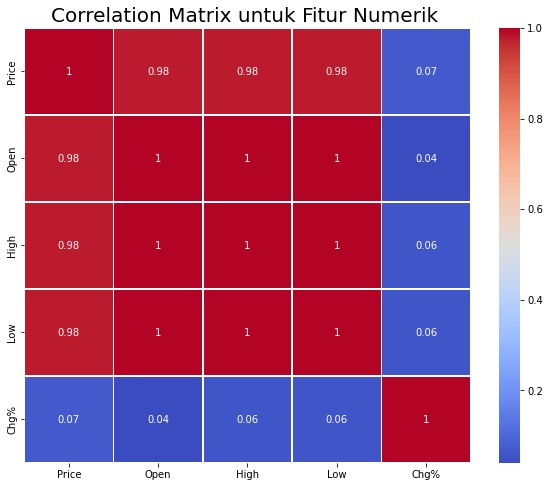

In [ ]:
# Evaluasi skor korelasinya
plt.figure(figsize=(10, 8))
correlation_matrix = gold.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
# Drop fitur Chg% karena memiliki korelasi yang kecil terhadap target (price)
gold.drop(['Chg%'], inplace=True, axis=1)
gold.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Price,Open,High,Low
14,1923.1,1935.9,1944.1,1919.1
36,1925.2,1912.3,1933.6,1908.0
37,1917.4,1900.0,1927.1,1890.4
38,1892.6,1867.8,1899.0,1867.8
39,1869.6,1842.5,1870.5,1839.9


# 4. Persiapan Data *(Data Preparation)*

# 4.1 Melakukan pembagian data pada dataset dengan train_test_split

In [ ]:
# Import library untuk pembagian data
from sklearn.model_selection import train_test_split
 
X = gold.drop(["Price"],axis =1)
y = gold["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
# Cek jumlah sampel pada masing-masing bagian
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2283
Total # of sample in train dataset: 1826
Total # of sample in test dataset: 457


# 4.2 Standarisasi nilai data pada fitur numerik dengan StandardScaler

In [ ]:
# Import library untuk standarisasi data
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['Open', 'High', 'Low']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Open,High,Low
514,-0.827494,-0.837126,-0.817554
2468,0.095993,0.087983,0.001160
373,-0.522784,-0.537759,-0.507336
2059,1.781545,1.764097,1.820192
916,-0.457865,-0.473978,-0.441243


Cek nilai mean dan standar deviasi apakah sudah sesuai atau belum. Standarisasi mengubah nilai mean menjadi 0 dan nilai standar deviasi menjadi 1

In [ ]:
X_train[numerical_features].describe().round(4)

,Open,High,Low
count,1826.0000,1826.0000,1826.0000
mean,-0.0000,0.0000,0.0000
std,1.0003,1.0003,1.0003
min,-1.9112,-1.8841,-1.9376
25%,-0.7181,-0.7149,-0.7193
50%,-0.3301,-0.3364,-0.3168
75%,0.7406,0.7488,0.7435
max,3.0349,3.0047,3.0146


# 5. Pembuatan Model

Menyiapkan data frame untuk analisis model

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

Latih data dengan model KNN

In [ ]:
# Import library model KNN
from sklearn.neighbors import KNeighborsRegressor
 
# Penerapan parameter
knn = KNeighborsRegressor(n_neighbors=3)
# Pembuatan model
knn.fit(X_train, y_train)
# Pengujian model terhadap data test
y_pred_knn = knn.predict(X_train)

Latih data dengan model Random Forest

In [ ]:
# Import library model RF
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Penerapan parameter 
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
# Pembuatan model
RF.fit(X_train, y_train)

# Penerapan metrik mse 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Latih data dengan model Boosting Algorithm

In [ ]:
# Import library model AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
 
# Penerapan parameter
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
# Pembuatan model                             
boosting.fit(X_train, y_train)

# Penerapan metrik mse
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# 6. Evaluasi Model

# 6.1 Standarisasi data uji

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 6.2 Evaluasi ketiga model sebelumnya

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,0.404256,1.14148
RF,0.130206,1.11838
Boosting,1.09377,1.41625


Buat bar chart untuk mempermudah melihat hasil evaluasi

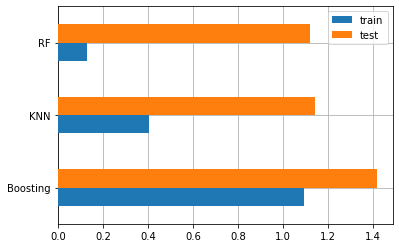

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Uji dengan membuat prediksi dari data test

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
848,1317.7,1368.7,1320.9,1349.3


# Penutupan

Model untuk memprediksi harga emas di masa mendatang telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Dengan melakukan evaluasi dengan 3 model yang berbeda seperti KNN, RF dan Boosting Algoritm maka didapat hasil prediksi yang paling mendekati data sebenarnya adalah dengan menggunakan model Random Forest.

***Referensi***


*   Dokumentasi penggunaan text cell pada notebook : https://github.com/fahmij8/ML-Exercise/blob/main/MLT-1/MLT_Proyek_Submission_1.ipynb
*   Panduan format laporan : https://drive.google.com/file/d/1nuwVL7DCv0a5kEw4aQ6yg4pa1gVeiwOU/view
*   Sumber Dataset : https://www.kaggle.com/shikhnu/gold-price



